In [1]:
from sklearn.model_selection import learning_curve, validation_curve #学习曲线模块
from sklearn.datasets import load_digits #digits数据集
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt #可视化模块
import numpy as np

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

#平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

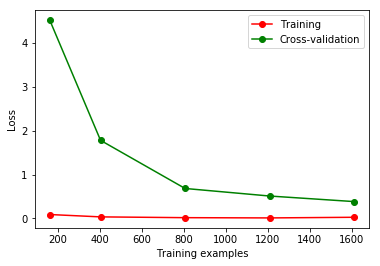

In [4]:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

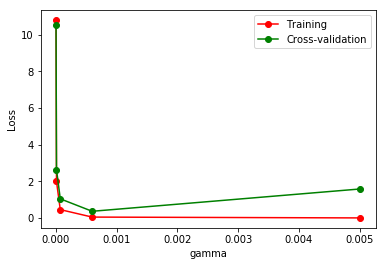

In [6]:
#建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()